<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Python-big-data/Assignment%201%20Pandas/team%2021/Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Delay 2017 <a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Nur Izzah Mardhiah binti Rashidi A20EC0116
2. Radin Dafina binti Radin Zulkar Nain A20EC0135

Lecturer: Prof. Madya. Ts. Dr. Mohd Shahizan Bin Othman

# **Downloading the Dataset**

1. Download the dataset from [Kaggle](https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur).

2. Unzip the file. The folder contains an Excel file, where the dataset is.

3. Upload the Excel file into Google Drive. 


To use the dataset, we mount the Google Drive to Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To read the dataset, we assign a variable named 'dataset' to the path of the file in Google Drive. 

In [ ]:
dataset_2017 = '/content/drive/MyDrive/Colab Notebooks/Assignment 2/2017.csv'

# **Sampling**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, warnings, scipy 
import random

In [ ]:
n = sum(1 for line in open(dataset_2017))
print("Before Sampling:", n, "rows")
df = pd.read_csv(dataset_2017)
print(df.info(verbose=False, memory_usage='deep'))

Before Sampling: 5674622 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674621 entries, 0 to 5674620
Columns: 28 entries, FL_DATE to Unnamed: 27
dtypes: float64(20), int64(3), object(5)
memory usage: 2.4 GB
None


In [ ]:
s = n//10
skip = sorted(random.sample(range(1, n+1), n-s))
df = pd.read_csv(dataset_2017, skiprows=skip)

In [ ]:
print("After 10% Sampling:", s, "rows")
print(df.info(verbose=False, memory_usage='deep'))

After 10% Sampling: 567462 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567462 entries, 0 to 567461
Columns: 28 entries, FL_DATE to Unnamed: 27
dtypes: float64(20), int64(3), object(5)
memory usage: 250.2 MB
None


# **Chunking**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
result = None
for chunk in pd.read_csv(dataset_2017, chunksize=1000):
    c = chunk['OP_CARRIER']
    chunk_result = c.value_counts()
    if result is None:
        result = chunk_result
    else:
        result = result.add(chunk_result, fill_value=0)

result.sort_values(ascending=False, inplace=True)
print(result)

WN    1329444.0
DL     923560.0
AA     896348.0
OO     706527.0
UA     584481.0
EV     339541.0
B6     298654.0
AS     185068.0
NK     156818.0
F9     103027.0
HA      80172.0
VX      70981.0
Name: OP_CARRIER, dtype: float64


# **Data Preparation and Cleaning**


In [ ]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,20,SFO,JFK,1530,1525.0,-5.0,16.0,1541.0,...,327.0,308.0,278.0,2586.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,AA,21,JFK,LAX,1900,1922.0,22.0,20.0,1942.0,...,407.0,416.0,359.0,2475.0,22.0,0.0,9.0,0.0,0.0,NaN
2,2017-01-01,AA,22,LAX,JFK,1340,1346.0,6.0,14.0,1400.0,...,328.0,317.0,289.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,AA,23,JFK,LAX,2215,2225.0,10.0,23.0,2248.0,...,402.0,398.0,366.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,AA,33,JFK,LAX,700,656.0,-4.0,26.0,722.0,...,400.0,446.0,363.0,2475.0,0.0,0.0,42.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567457,2017-12-31,UA,2099,SAN,IAH,1340,1343.0,3.0,9.0,1352.0,...,188.0,172.0,154.0,1303.0,NaN,NaN,NaN,NaN,NaN,NaN
567458,2017-12-31,UA,2121,IAH,EWR,610,605.0,-5.0,14.0,619.0,...,207.0,191.0,170.0,1400.0,NaN,NaN,NaN,NaN,NaN,NaN
567459,2017-12-31,UA,2124,MCO,EWR,1003,954.0,-9.0,13.0,1007.0,...,152.0,139.0,121.0,937.0,NaN,NaN,NaN,NaN,NaN,NaN
567460,2017-12-31,UA,2381,MIA,ORD,718,708.0,-10.0,17.0,725.0,...,201.0,202.0,166.0,1197.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info

<bound method DataFrame.info of            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0       2017-01-01         AA                 20    SFO  JFK          1530   
1       2017-01-01         AA                 21    JFK  LAX          1900   
2       2017-01-01         AA                 22    LAX  JFK          1340   
3       2017-01-01         AA                 23    JFK  LAX          2215   
4       2017-01-01         AA                 33    JFK  LAX           700   
...            ...        ...                ...    ...  ...           ...   
567457  2017-12-31         UA               2099    SAN  IAH          1340   
567458  2017-12-31         UA               2121    IAH  EWR           610   
567459  2017-12-31         UA               2124    MCO  EWR          1003   
567460  2017-12-31         UA               2381    MIA  ORD           718   
567461  2017-12-31         UA               2381    ORD  SAN          1225   

        DEP_TIME  DEP_DELAY  TA

Remove the column that contribute many null values

In [ ]:
df.drop(['Unnamed: 27', 'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1, inplace=True)

In [ ]:
df.isnull().any(axis=1).sum()

9523

## **Remove rows with null value**



In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info

<bound method DataFrame.info of            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0       2017-01-01         AA                 20    SFO  JFK          1530   
1       2017-01-01         AA                 21    JFK  LAX          1900   
2       2017-01-01         AA                 22    LAX  JFK          1340   
3       2017-01-01         AA                 23    JFK  LAX          2215   
4       2017-01-01         AA                 33    JFK  LAX           700   
...            ...        ...                ...    ...  ...           ...   
567457  2017-12-31         UA               2099    SAN  IAH          1340   
567458  2017-12-31         UA               2121    IAH  EWR           610   
567459  2017-12-31         UA               2124    MCO  EWR          1003   
567460  2017-12-31         UA               2381    MIA  ORD           718   
567461  2017-12-31         UA               2381    ORD  SAN          1225   

        DEP_TIME  DEP_DELAY  TA

## **Change Data Type**

In [ ]:
df.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
dtype: object

Convert string to DateTime

In [ ]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [ ]:
df['FL_DATE_month'] = pd.to_datetime(df['FL_DATE']).dt.month

**Filter non-delayed flights (negative)**

In [ ]:
df = df[(df['ARR_DELAY'] > 0)] 
df = df[(df['DEP_DELAY'] > 0)] 

## **Others**

**Change minutes to hours**

In [ ]:
df['ARR_DELAY'] = df['ARR_DELAY'] / 60
df['DEP_DELAY'] = df['DEP_DELAY'] / 60

**Rename airlines name**

In [ ]:
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

# **Exploratory Analysis and Visualization**



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FL_DATE_month
count,139653.000000,139653.000000,139653.000000,139653.000000,139653.000000,139653.000000,139653.000000,139653.000000,139653.000000,139653.000000,139653.000000,139653.0,139653.0,139653.000000,139653.000000,139653.000000,139653.000000,139653.000000
mean,2168.219200,1476.999413,1519.581133,0.810369,18.709229,1539.129872,1578.101079,7.664626,1620.311988,1573.312267,0.787551,0.0,0.0,146.237968,144.868882,118.495027,857.361324,6.327841
std,1762.262152,450.133621,482.275306,1.239021,12.010986,490.330482,589.915547,6.638329,512.534249,601.923269,1.239293,0.0,0.0,77.112526,78.188817,74.966805,622.016827,3.306265
min,1.000000,1.000000,1.000000,0.016667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.016667,0.0,0.0,18.000000,15.000000,8.000000,31.000000,1.000000
25%,719.000000,1130.000000,1156.000000,0.200000,11.000000,1210.000000,1249.000000,4.000000,1310.000000,1247.000000,0.166667,0.0,0.0,88.000000,86.000000,62.000000,386.000000,4.000000
50%,1678.000000,1524.000000,1553.000000,0.433333,15.000000,1608.000000,1710.000000,6.000000,1712.000000,1712.000000,0.400000,0.0,0.0,128.000000,126.000000,99.000000,687.000000,6.000000
75%,3245.000000,1835.000000,1915.000000,0.966667,22.000000,1930.000000,2033.000000,9.000000,2027.000000,2035.000000,0.933333,0.0,0.0,180.000000,179.000000,150.000000,1099.000000,9.000000
max,7439.000000,2359.000000,2400.000000,27.466667,183.000000,2400.000000,2400.000000,377.000000,2359.000000,2400.000000,27.600000,0.0,0.0,712.000000,730.000000,687.000000,4983.000000,12.000000


### **Bar Chart: Mean and Median Departure Delayed per Month**

Calculate the average and median for Departure Delay.

In [ ]:
dep_average = df.groupby('FL_DATE_month').DEP_DELAY.mean()
dep_median = df.groupby('FL_DATE_month').DEP_DELAY.median()

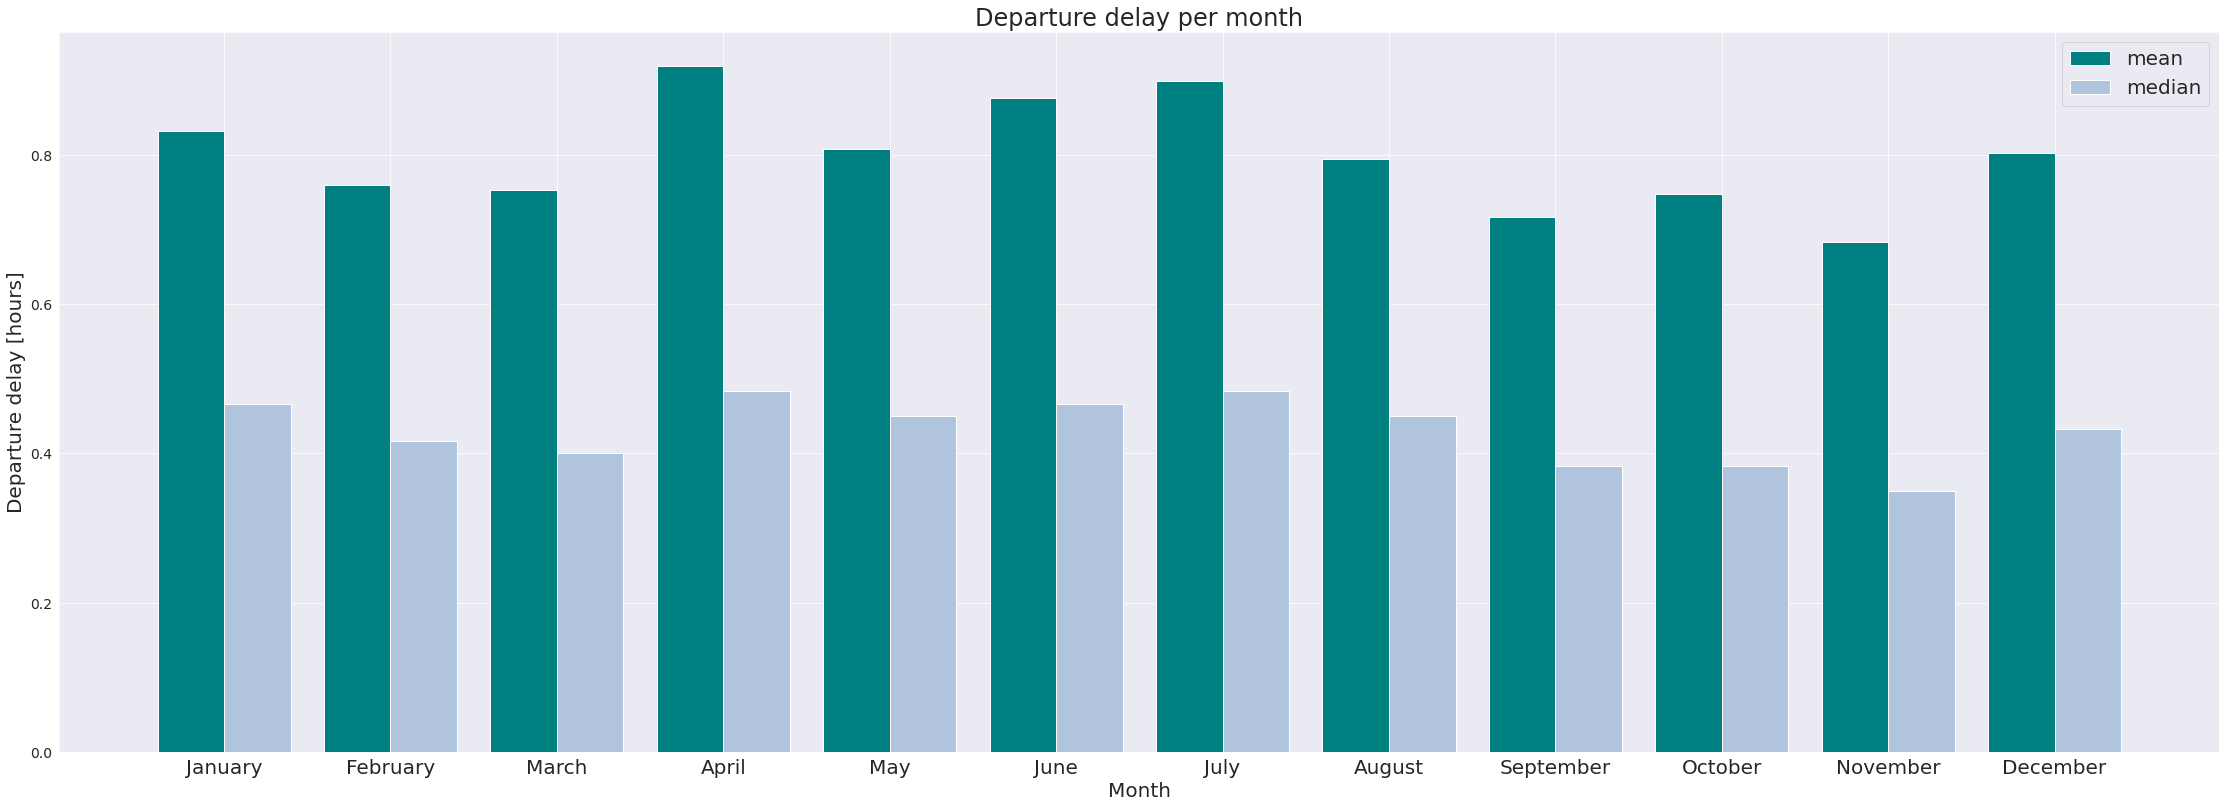

In [ ]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
X = np.arange(1,13)

fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])

p1 = ax.bar(X - 0.20, dep_average, color = 'teal', width = 0.40)
p2 = ax.bar(X + 0.20, dep_median, color = 'lightsteelblue', width = 0.40)
plt.xticks(X, month, fontsize = 20)

ax.set_xlabel('Month', fontsize = 20)
ax.set_ylabel('Departure delay [hours]', fontsize = 20)
ax.set_title('Departure delay per month', fontsize = 24)
ax.legend(labels=['mean', 'median'], fontsize = 20)

As we can see in this bar graph, the highest number of departure delay by hours was in April followed by July and June.

### **Scatter Plot**

Firstly, we need to group our dataset by airline name and month. Then, we calculate the total of departure delay (hours) for each month using .sum() function. 

In [70]:
total_hours = df.groupby(['OP_CARRIER', 'FL_DATE_month'],as_index=False)['DEP_DELAY'].sum()
month = total_hours.FL_DATE_month

In [71]:
total_hours

,OP_CARRIER,FL_DATE_month,DEP_DELAY
0,Alaska Airlines,1,233.966667
1,Alaska Airlines,2,219.516667
2,Alaska Airlines,3,200.100000
3,Alaska Airlines,4,174.766667
4,Alaska Airlines,5,168.716667
...,...,...,...
139,Virgin America,8,205.450000
140,Virgin America,9,109.866667
141,Virgin America,10,179.833333
142,Virgin America,11,91.733333


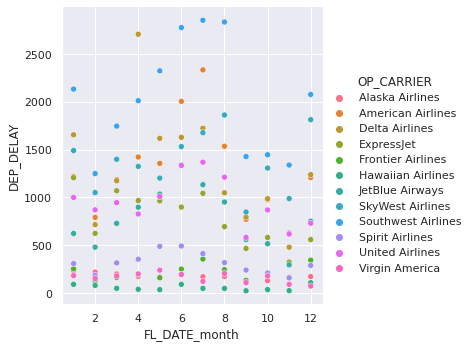

In [69]:
sns.set(rc={'figure.figsize':(50,40)})
s = sns.relplot(x=total_hours['FL_DATE_month'], 
            y=total_hours['DEP_DELAY'],
            data=total_hours, 
            hue = "OP_CARRIER", 
            kind='scatter')

Based on the scatter plot above, on January until November 2017, Frontier Airlines is the best airline of the year since it has the least delay (hours).

###  **Pie Chart: Top 10 Origin and Destination Airports** 

Sort top 10 airport with most flights

In [ ]:
#Airports with most flights
F_origin = df.ORIGIN.value_counts().sort_values(ascending=False)[:10]
F_dest = df.DEST.value_counts().sort_values(ascending=False)[:10]

Top 10 Busiest Origin Airports

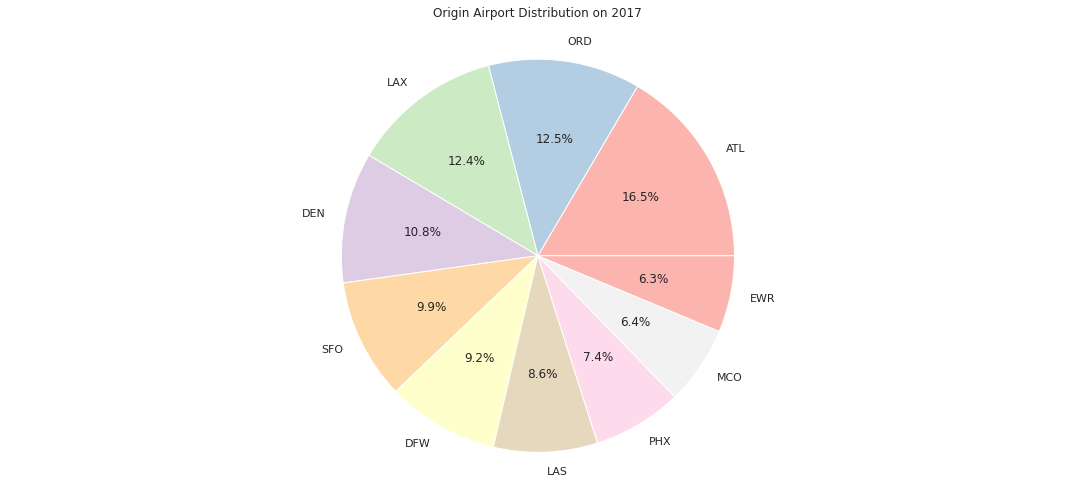

In [ ]:
colors = sns.color_palette('Pastel1')
fig, ax = plt.subplots(figsize=(19, 8))
ax.pie(F_origin, labels=F_origin.index,colors = colors, autopct="%1.1f%%")
ax.axis('equal')  
plt.title("Origin Airport Distribution on 2017\n")
plt.show()

Top 10 Busiest Destination Airports

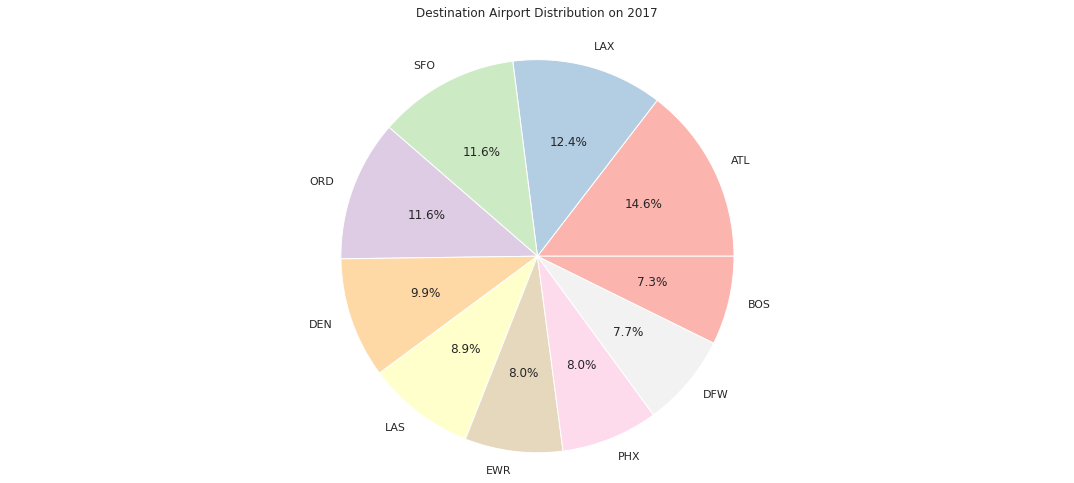

In [ ]:
colors = sns.color_palette('Pastel1')
fig, ax = plt.subplots(figsize=(19, 8))
ax.pie(F_dest, labels=F_dest.index,colors = colors, autopct="%1.1f%%")
ax.axis('equal')  
plt.title("Destination Airport Distribution on 2017\n")
plt.show()

Based on these two pie charts, most of the airport that is categorized as the busiest of origin airport are also found in the busiest of destination airport (LAX, DFW, SFO, EWR, LAS, PHX, ORD, ATL and DEN)

### **Line Graph: Departure Delay for Popular Airlines** 

Identify the top five popular airlines in United States 

In [66]:
most_delayed = df.groupby('OP_CARRIER').DEP_DELAY.sum().sort_values(ascending=False).head(5)
most_delayed

OP_CARRIER
Southwest Airlines    24223.550000
SkyWest Airlines      16500.450000
Delta Airlines        15777.466667
American Airlines     15442.100000
United Airlines       11372.800000
Name: DEP_DELAY, dtype: float64

In [63]:
busiest_airlines = df.groupby("OP_CARRIER").size().sort_values(ascending=False)[:5]
busiest_airlines

OP_CARRIER
Southwest Airlines    43191
American Airlines     20279
Delta Airlines        17344
SkyWest Airlines      15181
United Airlines       12164
dtype: int64

In [43]:
top5_airlines = [{'airline':'Southwest Airlines', 'color':'#233d4d'},
                 {'airline':'American Airlines', 'color':'#fe7f2d'},
                 {'airline':'Delta Airlines', 'color':'#fcca46'},
                 {'airline':'SkyWest Airlines', 'color':'#a1c181'},
                 {'airline':'United Airlines', 'color':'#619b8a'}]

Create function that calculate the mean of departure delay by month

In [49]:
def plot_delay(p):
    means = df[df['OP_CARRIER'] == p['airline']].groupby(['FL_DATE_month']).mean().reset_index() 
    line, = plt.plot(means['FL_DATE_month'], means['DEP_DELAY'], linestyle='solid', color=p['color'])
    return line              

Plot airline flights by month using given airline name and color.

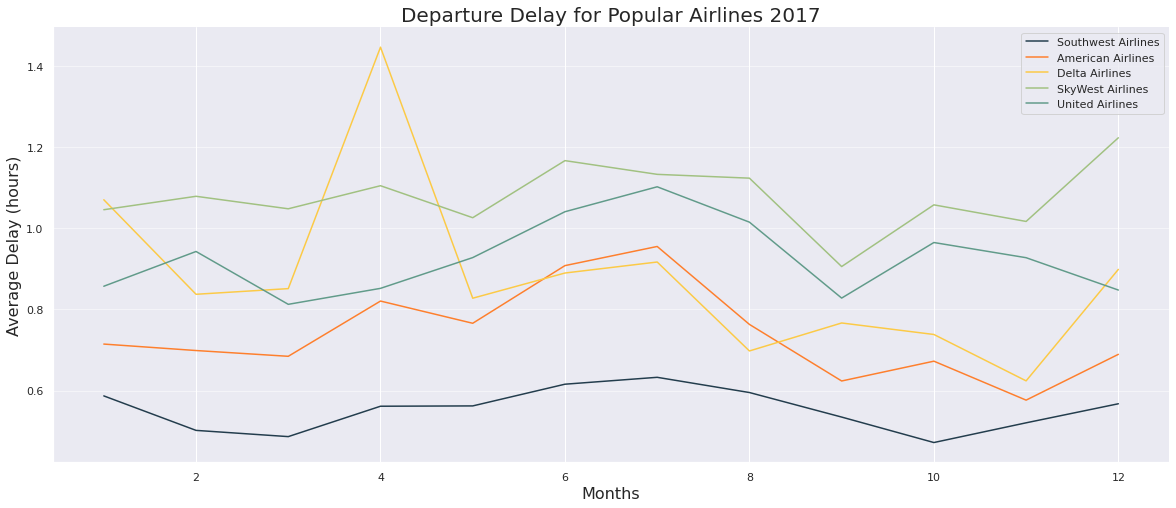

In [52]:
fig, ax = plt.subplots(figsize=(20, 8))

delay_handles = list(map(plot_delay, top5_airlines))
delay_labels = ['Southwest Airlines','American Airlines','Delta Airlines', 'SkyWest Airlines', 'United Airlines',]

plt.legend(delay_handles, delay_labels)
plt.grid(axis='y', linewidth = 0.5)
sns.despine(top=True)
ax.set_ylabel('Average Delay (hours)', fontsize=16)
ax.set_xlabel('Months', fontsize=16)
ax.set_title("Departure Delay for Popular Airlines 2017" , fontsize=20);

Based on the line graph, we can see that over the year of 2017, Skywest Airlines has the highest average of delay (per hours). There is also an interesting spike of average delay for Delta Airlines in April. Lastly, towards the end of the year, these top five airlines slowly increasing their departure delay, probably because there was new system implemented and data became more accurate.

### **Heat Map: Air Traffic by City** 

Create new column 'FL_DATE_day' and 'FL_DATE_week'

In [72]:
df['FL_DATE_day'] = pd.to_datetime(df['FL_DATE']).dt.day_name()
df['FL_DATE_week'] = pd.to_datetime(df['FL_DATE']).dt.dayofweek

In [73]:
df['FL_DATE_day']

1         Sunday
3         Sunday
9         Sunday
10        Sunday
11        Sunday
           ...  
567435    Sunday
567441    Sunday
567444    Sunday
567451    Sunday
567461    Sunday
Name: FL_DATE_day, Length: 139653, dtype: object

Count number of flights per week per airlines.

In [74]:
flight_pivot=df.pivot_table(index='ORIGIN',columns='FL_DATE_week', values='FL_DATE_day', aggfunc=lambda x:x.count())
flight_sort = flight_pivot.sort_values(by=1,ascending=False)[:10]
print(flight_sort)

FL_DATE_week       0       1       2       3       4      5       6
ORIGIN                                                             
ATL           1564.0  1173.0  1071.0  1373.0  1455.0  954.0  1172.0
ORD           1006.0   909.0   917.0  1115.0  1141.0  642.0   894.0
LAX           1125.0   811.0   833.0  1127.0  1080.0  618.0   982.0
DEN            880.0   773.0   835.0   973.0   863.0  669.0   702.0
DFW            741.0   611.0   619.0   733.0   815.0  625.0   744.0
SFO            842.0   586.0   749.0   924.0   874.0  528.0   749.0
LAS            679.0   580.0   651.0   736.0   785.0  463.0   637.0
PHX            584.0   496.0   547.0   662.0   617.0  440.0   552.0
MCO            451.0   479.0   480.0   498.0   491.0  525.0   488.0
BOS            530.0   462.0   397.0   495.0   590.0  316.0   395.0


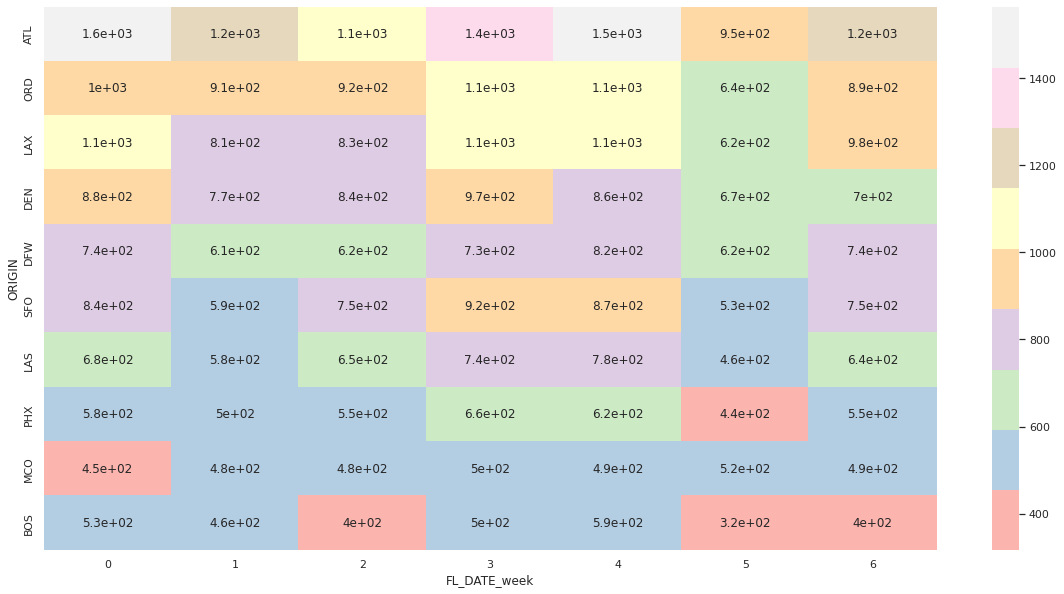

In [75]:
flight_sort = flight_sort.iloc[:10]

plt.figure(figsize=(20,10))
sns.heatmap(flight_sort, annot=True, cmap="Pastel1")
plt.show()

Looking at the diagram above, most of the origin airport have high number of air traffic on weeekdays, with ATL having the highest air traffic on Monday.


# **Asking and Answering Questions**



#### Q1: Which airlines has the least departure delays on 2017?

In [64]:
least_delays = df.groupby('OP_CARRIER').DEP_DELAY.sum().sort_values(ascending=True).head(1)
least_delays

OP_CARRIER
Hawaiian Airlines    682.983333
Name: DEP_DELAY, dtype: float64

In [ ]:
plt.figure(figsize=(20, 6))
c = ['mistyrose', 'antiquewhite', 'wheat', 'darksalmon', 'lightcoral', 'lavenderblush', 'cornsilk', 
          'papayawhip','bisque','peachpuff','navajowhite','hotpink']
df.groupby('OP_CARRIER').DEP_DELAY.sum().sort_values(ascending=False).plot.bar(color = c)
plt.title('Delays by Airlines on 2017', fontsize=16)
plt.xlabel('Airlines', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

*Hawaiian Airlines has the least delays with total of 588.08 hours on 2017*

#### Q2: Amirah is from MIA, she is planning to travel to anywhere at any time of the year. What is the least problematic flight that she could take?

In [ ]:
least_problematic = df[df['ORIGIN'] == 'MIA']

In [ ]:
least_problematic.sort_values(by=['DEP_DELAY'], ascending=True).head(1)

*Amirah can take American Airlines from her origin MIA to destination MCO on 23 March 2017.*

#### Q3: How many airlines offers flight from DFW to OGG on 2017-01-03?

In [ ]:
offered_flights = display(df[(df['ORIGIN']=='LAX') & (df['DEST'] == 'JFK') & (df['FL_DATE'] == '2017-01-03')])

*There is only one airline that offers flight from DFW to OGG on 3rd January 2017.*

#### Q4: Which flight travels the longest distance? What is the Origin and the Destination of the flight?

In [ ]:
longest_distance = df.sort_values(by=['DISTANCE'], ascending=False).head(1)

In [ ]:
print(longest_distance[['OP_CARRIER','ORIGIN','DEST','DISTANCE']])

*Hawaiian Airlines travels the longest distance on 2017, from JFK to HNL with a distance of 4983.0*

#### Q5: For each Origin, find the number of flights for three consecutive days. Use aggregation.

In [ ]:
group_origin_days = df.reset_index().groupby(['FL_DATE', 'ORIGIN']).size().reset_index(name='Count').set_index('FL_DATE')

In [ ]:
group_origin_days.groupby('ORIGIN')['Count'].rolling(window=3).sum().reset_index()

#**Inferences and Conclusion**



1.   All of the [top 5 most delayed airlines](https://colab.research.google.com/drive/1uLyJxJZWB1LF4rx7nVNvPJnAFVEKfCZA?authuser=2#scrollTo=AcK5Tziq0Ojj&line=1&uniqifier=1) (Southwest Airlines, SkyWest Airlines, Delta Airlines, American Airlines, United Airlines) are all listed in the [top 5 busiest airports](https://colab.research.google.com/drive/1uLyJxJZWB1LF4rx7nVNvPJnAFVEKfCZA?authuser=2#scrollTo=w9M8c6EMvI--&line=2&uniqifier=1) in the United States in 2017. There could be a line of aeroplanes waiting to take off on the runway in a congested or unusually busy airport. Thus, it is expected that they have higher number of delays compared to other airlines.

2.   On the other hand, the possible factor that contributes to the delay of these airlines on the beginning and end of the year is due to annual holidays. However, the highest average delay of all airlines is between April to July due to factors that we cannot predict and need more resources and informations about the dataset.  

> Thus, we can conclude that the delay of airlines is highly affected by the number of airlines being in one airport at the same time. 
--- 

1.   Every airline have different rate of efficiency of their operations and management systems which contribute to the different hours of delay.

2.   As we can see in [Line graph](https://colab.research.google.com/drive/1uLyJxJZWB1LF4rx7nVNvPJnAFVEKfCZA?authuser=2#scrollTo=N5ClMVUvlhu2&line=5&uniqifier=1), Southwest Airlines maintained to be the least delayed airlines compared to the other four popular airlines in 2017. Southwest Airlines may have a better management and operation systems thus contribute less to the average hours of delay over the year.

> Therefore, the average hours of delay over the year is highly affected by the performance of their operations system that controls the carrier delay, aircraft delay and security delay. 

---

> In conclusion, this dataset is insufficient if we want to determine the precise reason for the airline's delay.



#**References and Future Work**

In a further project, we would like to examine more data from more years and obtain more information each airline may have regarding the reason for a delay.

References:

1.   [Pandas Guide](https://pandas.pydata.org/docs/user_guide/text.html)
2.   [Data Visualization Guide](https://www.analyticsvidhya.com/blog/2021/02/an-intuitive-guide-to-visualization-in-python/)
2.   [Dataset](https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018)